#                                              Project 1
# Training Neural Networks

#  Step 1
Download the MNIST dataset from kaggel and apply any preprocessing needed on the data.
Split the data randomly into being 80% training set and 20% validation set

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Loading data 
data = pd.read_csv('D:\\mnist_train.csv\\mnist_train.csv')

# Separate the labels from the pixels values
labels = data['label']
pixels = data.drop('label', axis=1)

# Apply feature scaling to normalize the pixel values between 0 and 1
scaler = MinMaxScaler()
scaled_pixels = scaler.fit_transform(pixels)

# Split the data into training and validation sets
train_pixels, val_pixels, train_labels, val_labels = train_test_split(scaled_pixels, labels, test_size=0.2, random_state=42)



# Step 2
Build a neural network architecture from scratch using PyTorch. The network should have at
least two hidden layers and should use ReLU activation function between hidden layers. You
can change the number of hidden layers, number of perceptrons in each layer based on your
own preferences.
Train the model using:
• Optimizer: Adam
• Learning rate : 0.01
• Loss Function: Cross Entropy
Plot the following
• Training / Validation Loss.
• Training / Validation Accuracy.

Epoch [1/10], Train Loss: 0.1474, Train Accuracy: 0.9562, Val Loss: 0.1753, Val Accuracy: 0.9491
Epoch [2/10], Train Loss: 0.1122, Train Accuracy: 0.9675, Val Loss: 0.1583, Val Accuracy: 0.9568
Epoch [3/10], Train Loss: 0.1459, Train Accuracy: 0.9594, Val Loss: 0.1917, Val Accuracy: 0.9498
Epoch [4/10], Train Loss: 0.1263, Train Accuracy: 0.9702, Val Loss: 0.1895, Val Accuracy: 0.9584
Epoch [5/10], Train Loss: 0.0998, Train Accuracy: 0.9750, Val Loss: 0.1608, Val Accuracy: 0.9652
Epoch [6/10], Train Loss: 0.0928, Train Accuracy: 0.9758, Val Loss: 0.1873, Val Accuracy: 0.9629
Epoch [7/10], Train Loss: 0.0836, Train Accuracy: 0.9804, Val Loss: 0.1758, Val Accuracy: 0.9683
Epoch [8/10], Train Loss: 0.0896, Train Accuracy: 0.9800, Val Loss: 0.1878, Val Accuracy: 0.9652
Epoch [9/10], Train Loss: 0.0832, Train Accuracy: 0.9799, Val Loss: 0.1823, Val Accuracy: 0.9647
Epoch [10/10], Train Loss: 0.0655, Train Accuracy: 0.9825, Val Loss: 0.1823, Val Accuracy: 0.9661


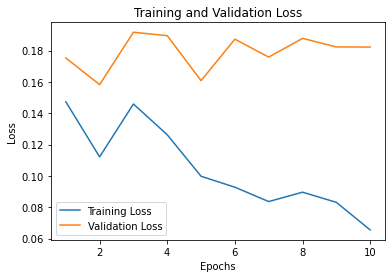

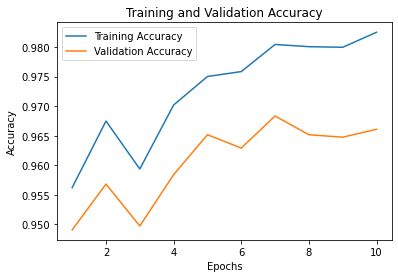

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
input_size = 784  # Number of input features (pixels)
hidden_size1 = 256  # Number of neurons in the first hidden layer
hidden_size2 = 128  # Number of neurons in the second hidden layer
num_classes = 10  # Number of output classes (0-9 digits)
learning_rate = 0.01
num_epochs = 10
batch_size = 64

# Convert the training data to PyTorch tensors
train_pixels_tensor = torch.tensor(train_pixels, dtype=torch.float32).to(device)
train_labels_tensor = torch.tensor(train_labels.values, dtype=torch.long).to(device)

# Create the model instance
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, num_classes).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store the loss and accuracy values
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

# Training loop
total_step = len(train_pixels_tensor) // batch_size
for epoch in range(num_epochs):
    for i in range(0, len(train_pixels_tensor), batch_size):
        # Mini-batch training data
        inputs = train_pixels_tensor[i:i+batch_size]
        labels = train_labels_tensor[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Compute training and validation accuracy
    with torch.no_grad():
        model.eval()

        train_outputs = model(train_pixels_tensor)
        train_loss = criterion(train_outputs, train_labels_tensor)
        train_acc = (train_outputs.argmax(dim=1) == train_labels_tensor).float().mean()

        val_outputs = model(torch.tensor(val_pixels, dtype=torch.float32).to(device))
        val_loss = criterion(val_outputs, torch.tensor(val_labels.values, dtype=torch.long).to(device))
        val_acc = (val_outputs.argmax(dim=1) == torch.tensor(val_labels.values, dtype=torch.long).to(device)).float().mean()

        # Store the loss and accuracy values
        train_loss_history.append(train_loss.item())
        val_loss_history.append(val_loss.item())
        train_acc_history.append(train_acc.item())
        val_acc_history.append(val_acc.item())

    # Print epoch statistics
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss.item():.4f}, Train Accuracy: {train_acc.item():.4f}, "
          f"Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_acc.item():.4f}")

# Plotting the training and validation loss
plt.plot(range(1, num_epochs+1), train_loss_history, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.plot(range(1, num_epochs+1), train_acc_history, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), val_acc_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# step 3
Add Dropout and Layer Normalization layers to your model’s architecture. Retrain the model and compare the following plots

• Train / Validation loss. • Train / Validation Accuracy.

Epoch [1/10], Train Loss: 0.1191, Train Accuracy: 0.9634, Val Loss: 0.1396, Val Accuracy: 0.9568
Epoch [2/10], Train Loss: 0.0865, Train Accuracy: 0.9721, Val Loss: 0.1204, Val Accuracy: 0.9620
Epoch [3/10], Train Loss: 0.0571, Train Accuracy: 0.9814, Val Loss: 0.1019, Val Accuracy: 0.9703
Epoch [4/10], Train Loss: 0.0919, Train Accuracy: 0.9732, Val Loss: 0.1461, Val Accuracy: 0.9627
Epoch [5/10], Train Loss: 0.0439, Train Accuracy: 0.9854, Val Loss: 0.1044, Val Accuracy: 0.9723
Epoch [6/10], Train Loss: 0.0541, Train Accuracy: 0.9832, Val Loss: 0.1261, Val Accuracy: 0.9679
Epoch [7/10], Train Loss: 0.0324, Train Accuracy: 0.9894, Val Loss: 0.1019, Val Accuracy: 0.9753
Epoch [8/10], Train Loss: 0.0247, Train Accuracy: 0.9920, Val Loss: 0.0968, Val Accuracy: 0.9757
Epoch [9/10], Train Loss: 0.0328, Train Accuracy: 0.9892, Val Loss: 0.1123, Val Accuracy: 0.9723
Epoch [10/10], Train Loss: 0.0248, Train Accuracy: 0.9920, Val Loss: 0.1103, Val Accuracy: 0.9758


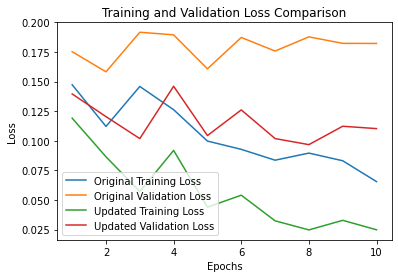

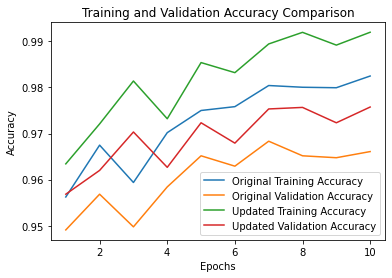

In [3]:
import torch.nn.functional as F

# Define the neural network architecture with Dropout and Layer Normalization
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes, dropout_rate):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.ln1 = nn.LayerNorm(hidden_size1)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.ln2 = nn.LayerNorm(hidden_size2)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.ln1(out)
        out = F.relu(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.ln2(out)
        out = F.relu(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        return out

# Define the hyperparameters for the updated model
dropout_rate = 0.2
num_epochs = 10

# Create a new instance of the model with Dropout and Layer Normalization
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, num_classes, dropout_rate).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store the loss and accuracy values for the updated model
train_loss_history_updated = []
val_loss_history_updated = []
train_acc_history_updated = []
val_acc_history_updated = []

# Training loop for the updated model
for epoch in range(num_epochs):
    for i in range(0, len(train_pixels_tensor), batch_size):
        # Mini-batch training data
        inputs = train_pixels_tensor[i:i+batch_size]
        labels = train_labels_tensor[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Compute training and validation accuracy for the updated model
    with torch.no_grad():
        model.eval()

        train_outputs = model(train_pixels_tensor)
        train_loss = criterion(train_outputs, train_labels_tensor)
        train_acc = (train_outputs.argmax(dim=1) == train_labels_tensor).float().mean()

        val_outputs = model(torch.tensor(val_pixels, dtype=torch.float32).to(device))
        val_loss = criterion(val_outputs, torch.tensor(val_labels.values, dtype=torch.long).to(device))
        val_acc = (val_outputs.argmax(dim=1) == torch.tensor(val_labels.values, dtype=torch.long).to(device)).float().mean()

        # Store the loss and accuracy values for the updated model
        train_loss_history_updated.append(train_loss.item())
        val_loss_history_updated.append(val_loss.item())
        train_acc_history_updated.append(train_acc.item())
        val_acc_history_updated.append(val_acc.item())

    # Print epoch statistics for the updated model
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss.item():.4f}, Train Accuracy: {train_acc.item():.4f}, "
          f"Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_acc.item():.4f}")

# Plotting the training and validation loss for both the original and updated models
plt.plot(range(1, num_epochs+1), train_loss_history, label='Original Training Loss')
plt.plot(range(1, num_epochs+1), val_loss_history, label='Original Validation Loss')
plt.plot(range(1, num_epochs+1), train_loss_history_updated, label='Updated Training Loss')
plt.plot(range(1, num_epochs+1), val_loss_history_updated, label='Updated Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Comparison')
plt.legend()
plt.show()

# Plotting the training and validation accuracy for both the original and updated models
plt.plot(range(1, num_epochs+1), train_acc_history, label='Original Training Accuracy')
plt.plot(range(1, num_epochs+1), val_acc_history, label='Original Validation Accuracy')
plt.plot(range(1, num_epochs+1), train_acc_history_updated, label='Updated Training Accuracy')
plt.plot(range(1, num_epochs+1), val_acc_history_updated, label='Updated Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.legend()
plt.show()


# Step 4
Train 3 more model based on the model architecture you chose in step 3. For each model you
will change the following:
• Learning Rate (0.001, 0.0005, 0.0001).
• Probability of Dropout. (0.2, 0.4, 0.6).

<Figure size 864x432 with 0 Axes>

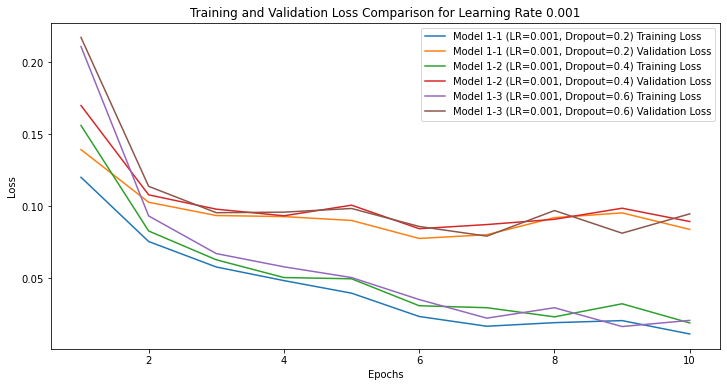

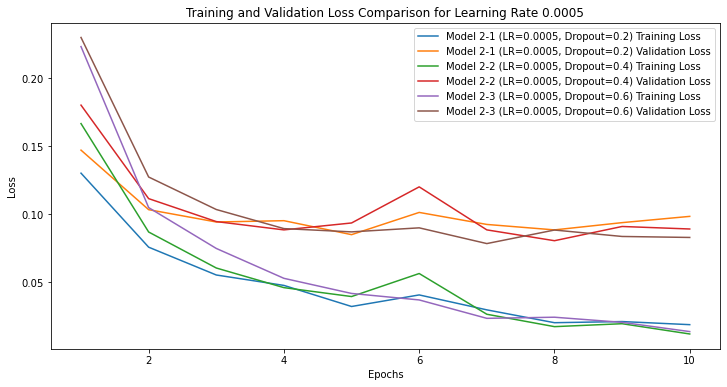

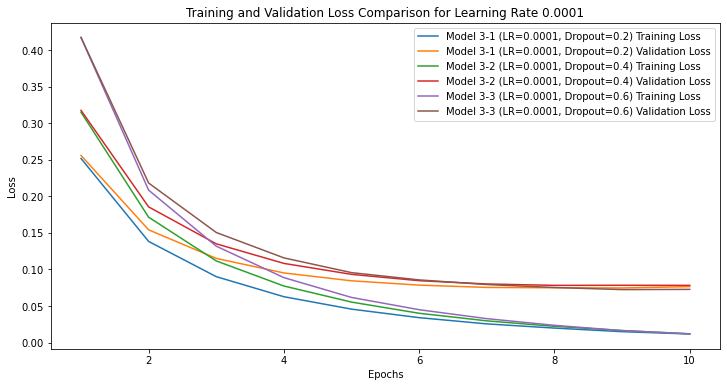

In [4]:
import matplotlib.pyplot as plt

# Define the hyperparameters for the additional models
learning_rates = [0.001, 0.0005, 0.0001]
dropout_probabilities = [0.2, 0.4, 0.6]
num_epochs = 10

# Lists to store the loss and accuracy values for each model
train_loss_history_models = []
val_loss_history_models = []
train_acc_history_models = []
val_acc_history_models = []

# Training loop for each additional model
for learning_rate in learning_rates:
    for dropout_prob in dropout_probabilities:
        # Create a new instance of the model with different learning rate and dropout probability
        model = NeuralNetwork(input_size, hidden_size1, hidden_size2, num_classes, dropout_prob).to(device)

        # Define the loss function and optimizer with different learning rate
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        # Lists to store the loss and accuracy values for the current model
        train_loss_history = []
        val_loss_history = []
        train_acc_history = []
        val_acc_history = []

        # Training loop for the current model
        for epoch in range(num_epochs):
            for i in range(0, len(train_pixels_tensor), batch_size):
                # Mini-batch training data
                inputs = train_pixels_tensor[i:i+batch_size]
                labels = train_labels_tensor[i:i+batch_size]

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Compute training and validation accuracy for the current model
            with torch.no_grad():
                model.eval()

                train_outputs = model(train_pixels_tensor)
                train_loss = criterion(train_outputs, train_labels_tensor)
                train_acc = (train_outputs.argmax(dim=1) == train_labels_tensor).float().mean()

                val_outputs = model(torch.tensor(val_pixels, dtype=torch.float32).to(device))
                val_loss = criterion(val_outputs, torch.tensor(val_labels.values, dtype=torch.long).to(device))
                val_acc = (val_outputs.argmax(dim=1) == torch.tensor(val_labels.values, dtype=torch.long).to(device)).float().mean()

                # Store the loss and accuracy values for the current model
                train_loss_history.append(train_loss.item())
                val_loss_history.append(val_loss.item())
                train_acc_history.append(train_acc.item())
                val_acc_history.append(val_acc.item())

        # Store the loss and accuracy values for the current model in the overall lists
        train_loss_history_models.append(train_loss_history)
        val_loss_history_models.append(val_loss_history)
        train_acc_history_models.append(train_acc_history)
        val_acc_history_models.append(val_acc_history)

# Plotting the training and validation loss for each model 
plt.figure(figsize=(12, 6))
for i in range(len(learning_rates)):
    plt.figure(figsize=(12, 6))
    for j in range(len(dropout_probabilities)):
        model_label = f"Model {i+1}-{j+1} (LR={learning_rates[i]}, Dropout={dropout_probabilities[j]})"
        plt.plot(range(1, num_epochs+1), train_loss_history_models[i * len(dropout_probabilities) + j],
                 label=f"{model_label} Training Loss")
        plt.plot(range(1, num_epochs+1), val_loss_history_models[i * len(dropout_probabilities) + j],
                 label=f"{model_label} Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss Comparison for Learning Rate {learning_rates[i]}')
    plt.legend()
    plt.show()


<Figure size 864x432 with 0 Axes>

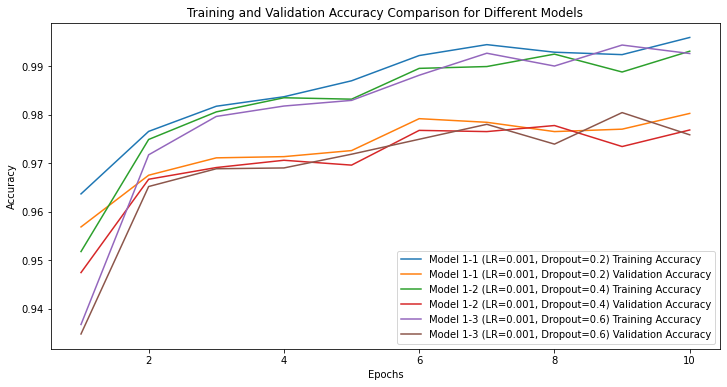

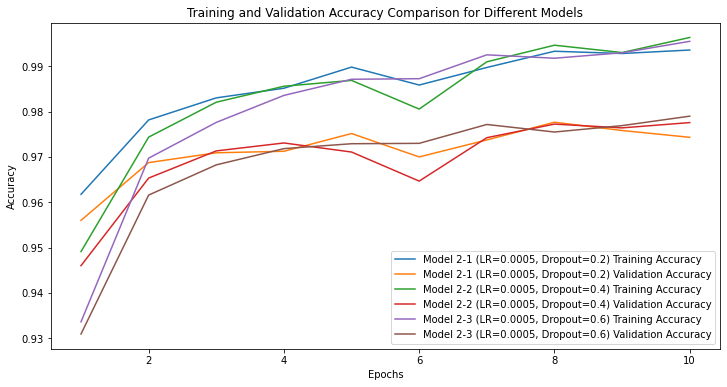

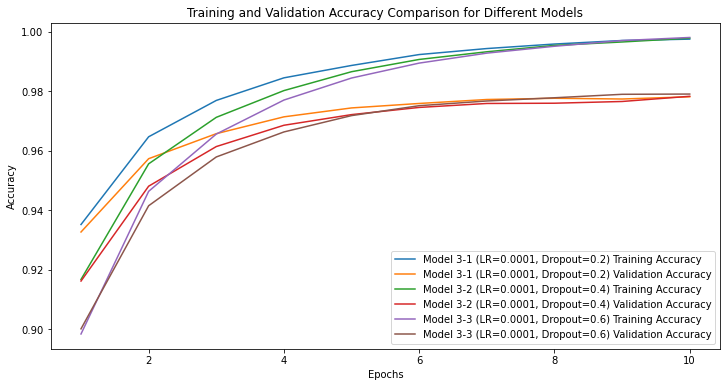

In [5]:
# Plotting the training and validation accuracy for each model 
plt.figure(figsize=(12, 6))
for i in range(len(learning_rates)):
    plt.figure(figsize=(12, 6))
    for j in range(len(dropout_probabilities)):
        model_label = f"Model {i+1}-{j+1} (LR={learning_rates[i]}, Dropout={dropout_probabilities[j]})"
        plt.plot(range(1, num_epochs+1), train_acc_history_models[i * len(dropout_probabilities) + j],
                 label=f"{model_label} Training Accuracy")
        plt.plot(range(1, num_epochs+1), val_acc_history_models[i * len(dropout_probabilities) + j],
                 label=f"{model_label} Validation Accuracy")

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy Comparison for Different Models')
    plt.legend()
    plt.show()